## Final Project Submission

Please fill out:
* Student name: GEOFFREY MWANGI WACHIRA
* Student pace: full time
* Scheduled project review date/time: 03/05/2024
* Instructor name:Samuel G. Mwangi
* Blog post URL: N/A


# Business Understanding

## Objective
The purpose of this analysis is to help Microsoft understand which types of films are performing well at the box office, providing actionable insights for their new movie studio.

## Business Problem
Microsoft is looking to enter the movie industry but lacks knowledge about movie production and performance metrics. This analysis aims to uncover key trends in the movie industry to guide Microsoft's decisions on what types of films to produce.

## Goal
Our goal is to analyze movie data to provide three concrete business recommendations to help Microsoft make informed decisions about their new movie studio.


## Data
Here, we'll describe the datasets we'll be working with and their relevance to the business problem.

Data Source
s1. :
Box Office Mojo: Provides information on movie box office performanc2. e.
IMDB: Contains comprehensive data on movies, including ratings and cast information.
Rotten Tomatoes: Offers movie reviews and ratings from critics and audiences.
TheMovieDB: A database for movies and TV shows, providing detailed information on titles and crew.
The Numbers: Provides data on movie budgets, revenues, and production costs.Numbers]


## Project Outline
We will conduct EDA on the movie and movie rating databases to identify trends and patterns in box office success. We will analyze factors such as genre, time period, ratings, budget, director, actor, and production country to identify what makes a successfuland profitable  movie. We will also identify any seasonal trends in movie releases and revenue.rThis wil help us answer wer the following questions:

* What are the most successful genres at the box office?
* How do ratings and revenue vary across different genres and time periods?
* Are there any seasonal trends in movie releases and revenue?
* Who are the most successful directors and actors in terms of revenue and ratings?
* What is the average budget for successful movies, and how does it vary across different genres?
* Are there any relationships between critical acclaim (e.g. movie ratings from critics) and box office revenue?
* What are the most popular countries for movie production and distribution, and how do their box office revenues compare?
* Are there any patterns in the runtime of successful movies, and how do they vary across different genres?

**Importing necessary libraries**

In [170]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
from datetime import datetime

# Data Preparation
In this section, we'll load and preprocess the datasets, ensuring they are ready for analysis

In [208]:
# Reading the data - Box Office Mojo - Movie Gross
bom_movie_gross = pd.read_csv('C:/Users/Hp/Desktop/Phase_One_Project/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz')

# Connecting to the database
conn = sqlite3.connect('C:/Users/Hp/Desktop/Phase_One_Project/dsc-phase-1-project-v2-4/zippedData/im.db/im.db')
cur = conn.cursor()

# Loading the movie_info table
rt_movie_info = pd.read_csv('C:/Users/Hp/Desktop/Phase_One_Project/dsc-phase-1-project-v2-4/zippedData/rt.movie_info.tsv.gz', delimiter='\t')

# Loading rt.reviews table
rt_reviews = pd.read_csv('C:/Users/Hp/Desktop/Phase_One_Project/dsc-phase-1-project-v2-4/zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')

# Loading tmdb data tables
tmdb_movies = pd.read_csv('C:/Users/Hp/Desktop/Phase_One_Project/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz')

# Loading tn.movie_budgets data table
tn_movie_budgets = pd.read_csv('C:/Users/Hp/Desktop/Phase_One_Project/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz')


Now, let's proceed with exploring each dataset in detail:
## 
1. Box Office Mojo - Movie Gross

In [172]:
# Shape
print("Box Office Mojo - Movie Gross's Shape is :", bom_movie_gross.shape)

print('************************************************************************')
print('************************************************************************')

# Displaying the first five elements of the dataset
print("First five elements:")
print(bom_movie_gross.head())

print('************************************************************************')
print('************************************************************************')

# Displaying the dataset info
print("Dataset info:")
bom_movie_gross.info()

print('************************************************************************')
print('************************************************************************')


# Descriptive statistics
print("Descriptive Statistics:")
print(bom_movie_gross.describe())

print('************************************************************************')
print('************************************************************************')

# Missing data
print("Missing Data:")
print(bom_movie_gross.isnull().sum())

print('************************************************************************')
print('************************************************************************')

# Duplicates
print("Duplicate Rows:")
print(bom_movie_gross[bom_movie_gross.duplicated()])

print('************************************************************************')
print('************************************************************************')


Box Office Mojo - Movie Gross's Shape is : (3387, 5)
************************************************************************
************************************************************************
First five elements:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
************************************************************************
************************************************************************
Dataset info:
<class 'pandas.core.frame.DataFrame'>

### Conclusions:

The dataset contains 3387 entries and 5 columns.
The columns include 'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'.
The 'domestic_gross' and 'foreign_gross' columns contain numeric data, while 'studio' and 'title' are categorical.
There are missing values in the 'studio', 'domestic_gross', and 'foreign_gross' columns.
The 'foreign_gross' column is of object type instead of numeric, suggesting potential data formatting issues.
Descriptive statistics show a wide range of domestic gross revenues, with a mean of approximately $28.7 million.
The dataset does not contain any duplicate rows.8.


In [173]:

# Converting 'foreign_gross' to numeric
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')

# Handling missing values
bom_movie_gross['domestic_gross'].fillna(bom_movie_gross['domestic_gross'].median(), inplace=True)
bom_movie_gross['foreign_gross'].fillna(0, inplace=True)
bom_movie_gross.dropna(subset=['studio'], inplace=True)


In [174]:
# Verifing changes
print(bom_movie_gross.info())
print(bom_movie_gross.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB
None
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [175]:
# creating total_gross column
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

# Change total_gross column to a float data type
bom_movie_gross['total_gross'] = pd.to_numeric(bom_movie_gross['total_gross'], errors='coerce')

In [176]:
# Grouping the data and sum the gross total  for each studio
studio_totals = bom_movie_gross.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(10)


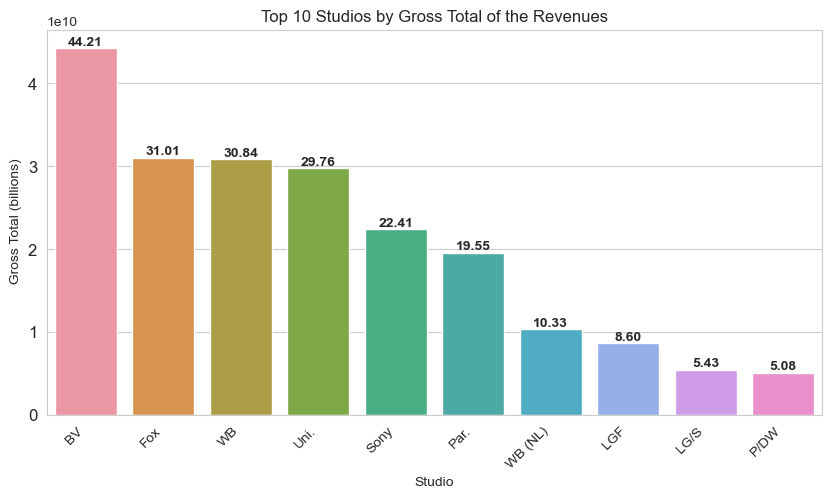

In [177]:
sns.set_style("whitegrid")
sns.set_palette("crest")
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=studio_totals.index, y=studio_totals.values)

sns.color_palette("tab10")

# Add labels and formatting
ax.set_title('Top 10 Studios by Gross Total of the Revenues')
ax.set_xlabel('Studio')
ax.set_ylabel(' Gross Total (billions)')
ax.set_xticklabels(studio_totals.index, rotation=45, ha='right')
ax.tick_params(axis='y', labelsize=12)
for i, v in enumerate(studio_totals.values):
    ax.text(i, v, f"{v/1e9:.2f}", ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()

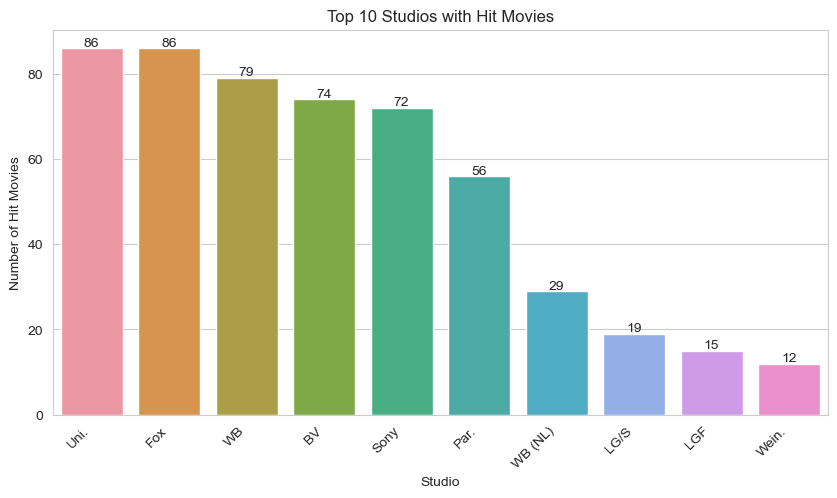

In [178]:
bom_movie_gross['hit'] = bom_movie_gross['total_gross'].apply(lambda x: 1 if x > 100000000 else 0)
hit_movies = bom_movie_gross[bom_movie_gross['hit'] == 1]

# Group the hit movies by studio and calculate the number of hit movies per studio
studio_hit_counts = hit_movies.groupby('studio')['hit'].sum().sort_values(ascending=False).head(10)

# Create a bar plot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=studio_hit_counts.index, y=studio_hit_counts.values)

sns.color_palette("mako")

ax.set_title('Top 10 Studios with Hit Movies')
ax.set_xlabel('Studio')
ax.set_ylabel('Number of Hit Movies')
ax.set_xticklabels(studio_hit_counts.index, rotation=45, ha='right')
for i, v in enumerate(studio_hit_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.show()

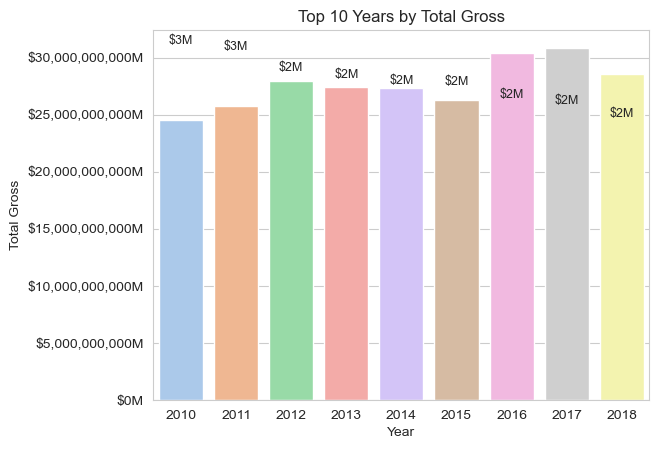

In [179]:
# Group the data by year and total gross, and sum the values
yearly_gross = bom_movie_gross.groupby('year')['total_gross'].sum().reset_index()

# Sort the values in descending order
yearly_gross = yearly_gross.sort_values('total_gross', ascending=False).head(10)

# Create a barplot with seaborn
ax = sns.barplot(x='year', y='total_gross', data=yearly_gross, palette='pastel')

# Add data labels above each bar
for i, v in enumerate(yearly_gross['total_gross']):
    ax.text(i, v + 0.01*v, f"${int(v/1e10)}M", ha='center', fontsize=9)

# Format y-axis ticks as millions
ax.yaxis.set_major_formatter('${x:,.0f}M')

# Set the title and axis labels
plt.title('Top 10 Years by Total Gross')
plt.xlabel('Year')
plt.ylabel('Total Gross')

# Show the plot
plt.show()


C:\Users\Hp\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


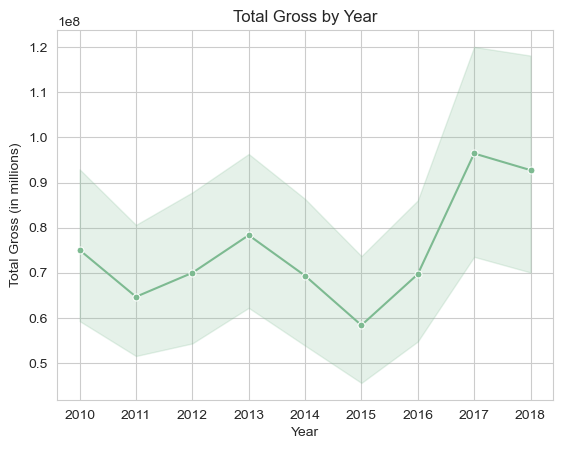

<Figure size 1000x500 with 0 Axes>

In [180]:
# sns.lineplot(x="year", y="total_gross", data=data)
pd.option_context('mode.use_inf_as_na', True)
# Replace infinite values with NaN
bom_movie_gross.replace([np.inf, -np.inf], np.nan, inplace=True)
# Create a lineplot with seaborn
ax = sns.lineplot(x='year', y='total_gross', data=bom_movie_gross, marker='o', markersize=5)


# Format x-axis ticks as integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the title and axis labels
plt.title('Total Gross by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross (in millions)')

# Set the size of the plot
plt.figure(figsize=(10, 5))

# Show the plot
plt.show();

##2. Rotten Tomatoes - Movie Info

In [181]:
# Alook at the Shape
print("Rotten Tomatoes - Movie Info's Shape is :", rt_movie_info.shape)

print('************************************************************************')
print('************************************************************************')

# Displaying the first five elements of the dataset
print("First five elements:")
print(rt_movie_info.head())

print('************************************************************************')
print('************************************************************************')

# Displaying the dataset info
print("Dataset info:")
rt_movie_info.info()

print('************************************************************************')
print('************************************************************************') 

# Descriptive statistics
print("Descriptive Statistics:")
print(rt_movie_info.describe())

print('************************************************************************')
print('************************************************************************')

# Missing data
print("Missing Data:")
print(rt_movie_info.isnull().sum())

print('************************************************************************')
print('************************************************************************')

# Duplicates
print("Duplicate Rows:")
print(rt_movie_info[rt_movie_info.duplicated()])

print('************************************************************************')
print('************************************************************************')


Rotten Tomatoes - Movie Info's Shape is : (1560, 12)
************************************************************************
************************************************************************
First five elements:
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                

### Conclusion:
The dataset contains information about 1560 movies.
Several columns have missing values, including 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', and 'studio'.
The 'currency' and 'box_office' columns seem to have significant missing values (1220 out of 1560).
The 'runtime' column has a few missing values (30 out of 1560).
The 'studio' column has many missing values (1066 out of 1560).
The 'rating' column has only a few missing values (3 out of 1560).

This dataset provides information about movie synopses, ratings, genres, directors, writers, theater and DVD release dates, currency, box office, runtime, and studios.

In [182]:

# Converting 'box_office' to numeric
rt_movie_info['box_office'] = pd.to_numeric(rt_movie_info['box_office'], errors='coerce')

# Handling missing values
# Dropping 'currency' and 'box_office' columns
rt_movie_info.drop(columns=['currency', 'box_office'], inplace=True)  
# Dropping rows with missing values in selected columns
rt_movie_info.dropna(subset=['director', 'writer', 'theater_date', 'dvd_date', 'runtime'], inplace=True)
# Replacing missing 'synopsis' values with placeholder
rt_movie_info['synopsis'].fillna("No synopsis available", inplace=True)  
# Replacing missing 'genre' values with placeholder
rt_movie_info['genre'].fillna("Unknown", inplace=True) 
 # Replacing missing 'studio' values with placeholder
rt_movie_info['studio'].fillna("Unknown", inplace=True) 



In [183]:
# Verifing changes
print(rt_movie_info.info())
print(rt_movie_info.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 1558
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            884 non-null    int64 
 1   synopsis      884 non-null    object
 2   rating        884 non-null    object
 3   genre         884 non-null    object
 4   director      884 non-null    object
 5   writer        884 non-null    object
 6   theater_date  884 non-null    object
 7   dvd_date      884 non-null    object
 8   runtime       884 non-null    object
 9   studio        884 non-null    object
dtypes: int64(1), object(9)
memory usage: 76.0+ KB
None
id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
studio          0
dtype: int64


## 3. Rotten Tomatoes - Reviews

In [184]:
# Shape
print("Shape:", rt_reviews.shape)
print('************************************************************************')
print('************************************************************************')

# Displaying the dataset info
print("Dataset info:")
rt_reviews.info()

print('************************************************************************')
print('************************************************************************')

# Displaying the first five elements of the dataset
print("First five elements:")
print(rt_reviews.head())

print('************************************************************************')
print('************************************************************************')

# Descriptive statistics
print("Descriptive Statistics:")
print(rt_reviews.describe())
print('************************************************************************')
print('************************************************************************')

# Missing data
print("Missing Data:")
print(rt_reviews.isnull().sum())
print('************************************************************************')
print('************************************************************************')

# Duplicates
print("Duplicate Rows:")
print(rt_reviews[rt_reviews.duplicated()])
print('************************************************************************')
print('************************************************************************')


Shape: (54432, 8)
************************************************************************
************************************************************************
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
************************************************************************
************************************************************************
First five elements:
   id                                             review rating   fresh  \
0   3  A distinctly ga

### Conclusion:
The dataset contains information about 54432 movie reviews.
Columns like 'review', 'rating', 'critic', and 'publisher' have missing values.
The 'rating' column contains ratings in different formats (e.g., 3/5, 4.5/5, 4/5, 2/5, 0.5/5), which might need standardization.
Some duplicate rows are present in the dataset.

This dataset contains movie reviews from critics, including their ratings and freshness status.

In [185]:

# Handling missing values
rt_reviews['review'].fillna("No review available", inplace=True)  # Replace missing 'review' values with placeholder
rt_reviews['critic'].fillna("Unknown", inplace=True)  # Replace missing 'critic' values with placeholder
rt_reviews['publisher'].fillna("Unknown", inplace=True)  # Replace missing 'publisher' values with placeholder
rt_reviews.dropna(subset=['rating'], inplace=True)  # Drop rows with missing 'rating' values

# Converting 'rating' column to string
rt_reviews['rating'] = rt_reviews['rating'].astype(str)

# Removing '/5' from ratings
rt_reviews['rating'] = rt_reviews['rating'].str.replace('/5', '')

# Converting ratings to numeric format
rt_reviews['rating'] = pd.to_numeric(rt_reviews['rating'], errors='coerce')

# Dropping rows with missing 'rating' values
rt_reviews.dropna(subset=['rating'], inplace=True)


# Removing duplicate rows
rt_reviews.drop_duplicates(inplace=True)


In [186]:
# Verifying changes
print(rt_reviews.info())
print(rt_reviews.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 17785 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          17785 non-null  int64  
 1   review      17785 non-null  object 
 2   rating      17785 non-null  float64
 3   fresh       17785 non-null  object 
 4   critic      17785 non-null  object 
 5   top_critic  17785 non-null  int64  
 6   publisher   17785 non-null  object 
 7   date        17785 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB
None
id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64


4. The Movie Database (TMDB) - Movies

In [187]:
# Shape
print("Shape:", tmdb_movies.shape)

print('************************************************************************')
print('************************************************************************')

# Displaying the dataset info
print("Dataset info:")
tmdb_movies.info()

print('************************************************************************')
print('************************************************************************')

print("First five elements:")
print(tmdb_movies.head())

print('************************************************************************')
print('************************************************************************')

# Descriptive statistics
print("Descriptive Statistics:")
print(tmdb_movies.describe())

print('************************************************************************')
print('************************************************************************')

# Missing data
print("Missing Data:")
print(tmdb_movies.isnull().sum())

print('************************************************************************')
print('************************************************************************')

# Duplicates
print("Duplicate Rows:")
print(tmdb_movies[tmdb_movies.duplicated()])

print('************************************************************************')
print('************************************************************************')


Shape: (26517, 10)
************************************************************************
************************************************************************
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
************************************************************************
*

### Conclusions

There are no missing values in any of the columns.
No duplicate rows were found in the dataset
The 'release_date' column is in string format and should be converted to datetime for further analysis..

This dataset contains information about movie release dates, titles, production budgets, domestic gross revenues, and worldwide gross revenues.

In [188]:
# Converting 'release_date' to datetime format
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])

# Droping unnecessary columns
tmdb_movies.drop(columns=['Unnamed: 0', 'genre_ids'], inplace=True)


In [197]:
# Verifying changes
print(tmdb_movies.info())
print(tmdb_movies.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 26517 non-null  int64         
 1   original_language  26517 non-null  object        
 2   original_title     26517 non-null  object        
 3   popularity         26517 non-null  float64       
 4   release_date       26517 non-null  datetime64[ns]
 5   title              26517 non-null  object        
 6   vote_average       26517 non-null  float64       
 7   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.6+ MB
None
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


## 5. The Numbers - Movie Budgets

In [209]:
# Shape
print("Shape:", tn_movie_budgets.shape)

print('************************************************************************')
print('************************************************************************')

# Displaying the dataset info
print("Dataset info:")
tn_movie_budgets.info()

print('************************************************************************')
print('************************************************************************')

print("First five elements:")
print(tn_movie_budgets.head())

print('************************************************************************')
print('************************************************************************')

# Descriptive statistics
print("Descriptive Statistics:")
print(tn_movie_budgets.describe())

print('************************************************************************')
print('************************************************************************')

# Missing data
print("Missing Data:")
print(tn_movie_budgets.isnull().sum())

print('************************************************************************')
print('************************************************************************')

# Duplicates
print("Duplicate Rows:")
print(tn_movie_budgets[tn_movie_budgets.duplicated()])

print('************************************************************************')
print('************************************************************************')


Shape: (5782, 6)
************************************************************************
************************************************************************
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
************************************************************************
************************************************************************
First five elements:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                   

### Conclusions

There are no missing values in any of the columns.
No duplicate rows were found in the dataset.

The dataset contains information about movie releases, including movie titles, release dates, production budgets, domestic and worldwide gross revenues.

The 'release_date' column is in string format and should be converted to datetime

The 'production_budget', 'domestic_gross', and 'worldwide_gross' columns are currently in string format and should be converted to numeric

The 'production_budget' column represents the budget allocated for producing the movie, which can be compared with the gross revenue to assess profitability.

In [210]:
# Converting 'release_date' to datetime format
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

# Removing '$' and ',' characters and converting columns to numeric
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate profit
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

# Fill NaN values with 0 (or any appropriate value)
tn_movie_budgets.fillna(0, inplace=True)


In [211]:
# Display the DataFrame
print(tn_movie_budgets)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross        profit  
0           425000000.0     760507625.0     2.776345e+09  2.351345e+09  
1           4

In [204]:
# Confirming the changes
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


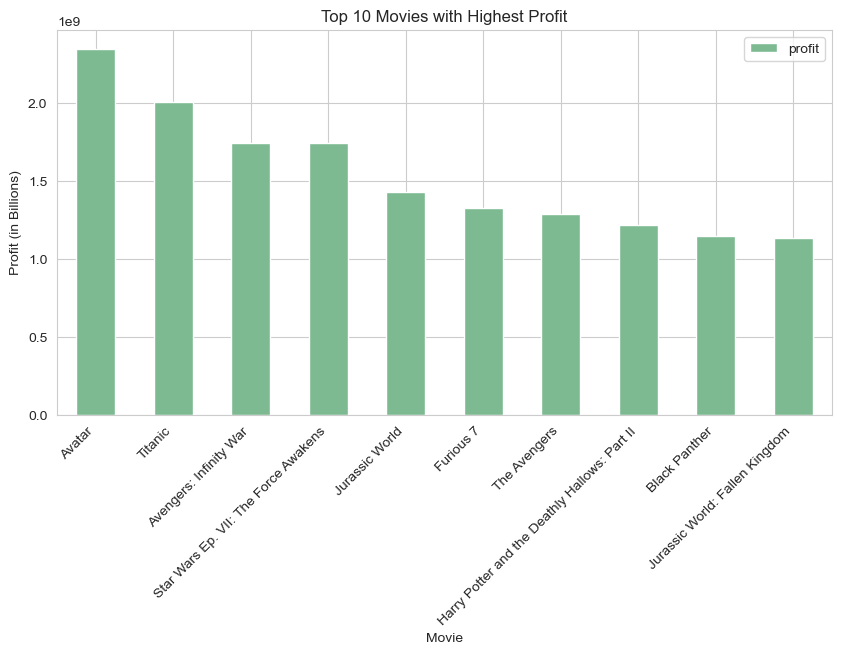

In [218]:
# Plot of top 10 movies with highest profit
fig, ax = plt.subplots(figsize=(10, 5))
most_profitable_movies.plot(kind='bar', x='movie', y='profit', ax=ax)

# Set the color palette
colors = sns.color_palette("YlOrBr", len(most_profitable_movies))

# Add labels and formatting
ax.set_title('Top 10 Movies with Highest Profit')
ax.set_xlabel('Movie')
ax.set_ylabel('Profit (in Billions)')

ax.set_xticklabels(most_profitable_movies['movie'], rotation=45, ha='right')

# Show the plot
plt.show()

In [241]:
# Define a lambda function to extract the year from the Timestamp object
extract_year = lambda date_str: date_str.year

# Applying the function to the release_date column
tn_movie_budgets['release_year'] = tn_movie_budgets['release_date'].apply(extract_year)


In [242]:
# Checking the results
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,2017


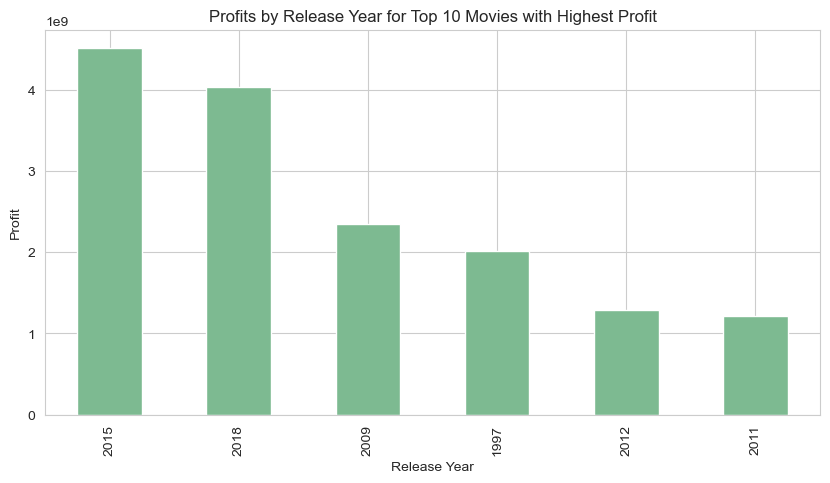

In [245]:
# Grouping profits by release year for top 10 movies with highest profit
profit_by_year = most_profitable_movies.groupby(tn_movie_budgets['release_year'])['profit'].sum().sort_values(ascending=False).head(10)

# Plotting profits by release year for top 10 movies with highest profit arranged by year ascending
profit_by_year.plot(kind='bar', figsize=(10, 5))

# Adding title and labels
plt.title('Profits by Release Year for Top 10 Movies with Highest Profit')
plt.xlabel('Release Year')
plt.ylabel('Profit')

# Displaying the plot
plt.show()


## Data Base Overview  - IMDB

In [246]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
for table in tables:
    print(table[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


### movie_basics table

In [247]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [248]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [249]:
# Shape
print("Shape:", movie_basics.shape)

print('************************************************************************')
print('************************************************************************')

# Displaying the dataset info
print("Dataset info:")
movie_basics.info()

print('************************************************************************')
print('************************************************************************')

print("First five elements:")
print(movie_basics.head())

print('************************************************************************')
print('************************************************************************')

# Descriptive statistics
print("Descriptive Statistics:")
print(movie_basics.describe())

print('************************************************************************')
print('************************************************************************')

# Missing data
print("Missing Data:")
print(movie_basics.isnull().sum())

print('************************************************************************')
print('************************************************************************')

# Duplicates
print("Duplicate Rows:")
print(movie_basics.duplicated().sum())

print('************************************************************************')
print('************************************************************************')

Shape: (146144, 6)
************************************************************************
************************************************************************
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
************************************************************************
************************************************************************
First five elements:
    movie_id                    primary_title              original_title  \
0  tt0063540                 

#### Conclusions

The data had no duplicates

The data has missing values, dropping all the collumns with NaN values seems okay.

In [250]:
movie_basics.dropna(inplace=True)

In [251]:
#Checking the changes
print(movie_basics.isnull().sum())

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [252]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


### movie_ratings

In [253]:
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [254]:
# Shape
print("Shape:", movie_ratings.shape)

print('************************************************************************')
print('************************************************************************')

# Displaying the dataset info
print("Dataset info:")
movie_ratings.info()

print('************************************************************************')
print('************************************************************************')

print("First five elements:")
print(movie_ratings.head())

print('************************************************************************')
print('************************************************************************')

# Descriptive statistics
print("Descriptive Statistics:")
print(movie_ratings.describe())

print('************************************************************************')
print('************************************************************************')

# Missing data
print("Missing Data:")
print(movie_ratings.isnull().sum())

print('************************************************************************')
print('************************************************************************')

# Duplicates
print("Duplicate Rows:")
print(movie_ratings.duplicated().sum())

print('************************************************************************')
print('************************************************************************')

Shape: (73856, 3)
************************************************************************
************************************************************************
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
************************************************************************
************************************************************************
First five elements:
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
*******************************

#### Conclusions

The data has no missing or duplicate values.

In [255]:
#Combining the movie_basics and movie_ratings tables

movie_basics_combined = pd.merge(movie_basics,movie_ratings,how='left')
movie_basics_combined

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...,...
112227,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11.0
112228,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,NaN,NaN
112229,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
112230,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",NaN,NaN


In [256]:
# Shape
print("Shape:", movie_basics_combined.shape)

print('************************************************************************')
print('************************************************************************')

# Displaying the dataset info
print("Dataset info:")
movie_basics_combined.info()

print('************************************************************************')
print('************************************************************************')

print("First five elements:")
print(movie_basics_combined.head())

print('************************************************************************')
print('************************************************************************')

# Descriptive statistics
print("Descriptive Statistics:")
print(movie_basics_combined.describe())

print('************************************************************************')
print('************************************************************************')

# Missing data
print("Missing Data:")
print(movie_basics_combined.isnull().sum())

print('************************************************************************')
print('************************************************************************')

# Duplicates
print("Duplicate Rows:")
print(movie_basics_combined.duplicated().sum())

print('************************************************************************')
print('************************************************************************')

Shape: (112232, 8)
************************************************************************
************************************************************************
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112232 entries, 0 to 112231
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
 6   averagerating    65720 non-null   float64
 7   numvotes         65720 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.9+ MB
************************************************************************
************************************************************************
First five elements:
    movie_id

#### Conclusion
There are missing data in averagerating and numvotes

In [257]:
# dropping NaN Values
movie_basics_combined.dropna(inplace=True)

In [258]:
movie_basics_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 112227
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.5+ MB


In [259]:
# Confirming for missing values 
movie_basics_combined.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [260]:
movie_basics_combined.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
5,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0


In [ ]:
#genres with highest average ratings
highest_ratings = movie_basics_combined.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10)
highest_ratings

In [ ]:
#plot of genres with highest average ratings
highest_ratings.plot(kind='bar',figsize=(10,5))

plt.title('Genres with Highest Average Ratings')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.show()


# Exploraratory Data Analysis

## Univariate Data Analysis